Анализ и подготовка данных:

— Загрузите датасет California housing dataset.
— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.
— Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20.
— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.
— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.
— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).
— Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### — Загрузите датасет California housing dataset.

In [42]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
df_house = pd.DataFrame(california_housing.data)
df_house['target'] = pd.Series(california_housing.target)
df_house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


:Attribute Information:

    - MedInc        median income in block group
    
    - HouseAge      median house age in block group
    
    - AveRooms      average number of rooms per household
    
    - AveBedrms     average number of bedrooms per household
    
    - Population    block group population
   
    - AveOccup      average number of household members
   
    - Latitude      block group latitude
   
    - Longitude     block group longitude


— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.


In [43]:
df_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


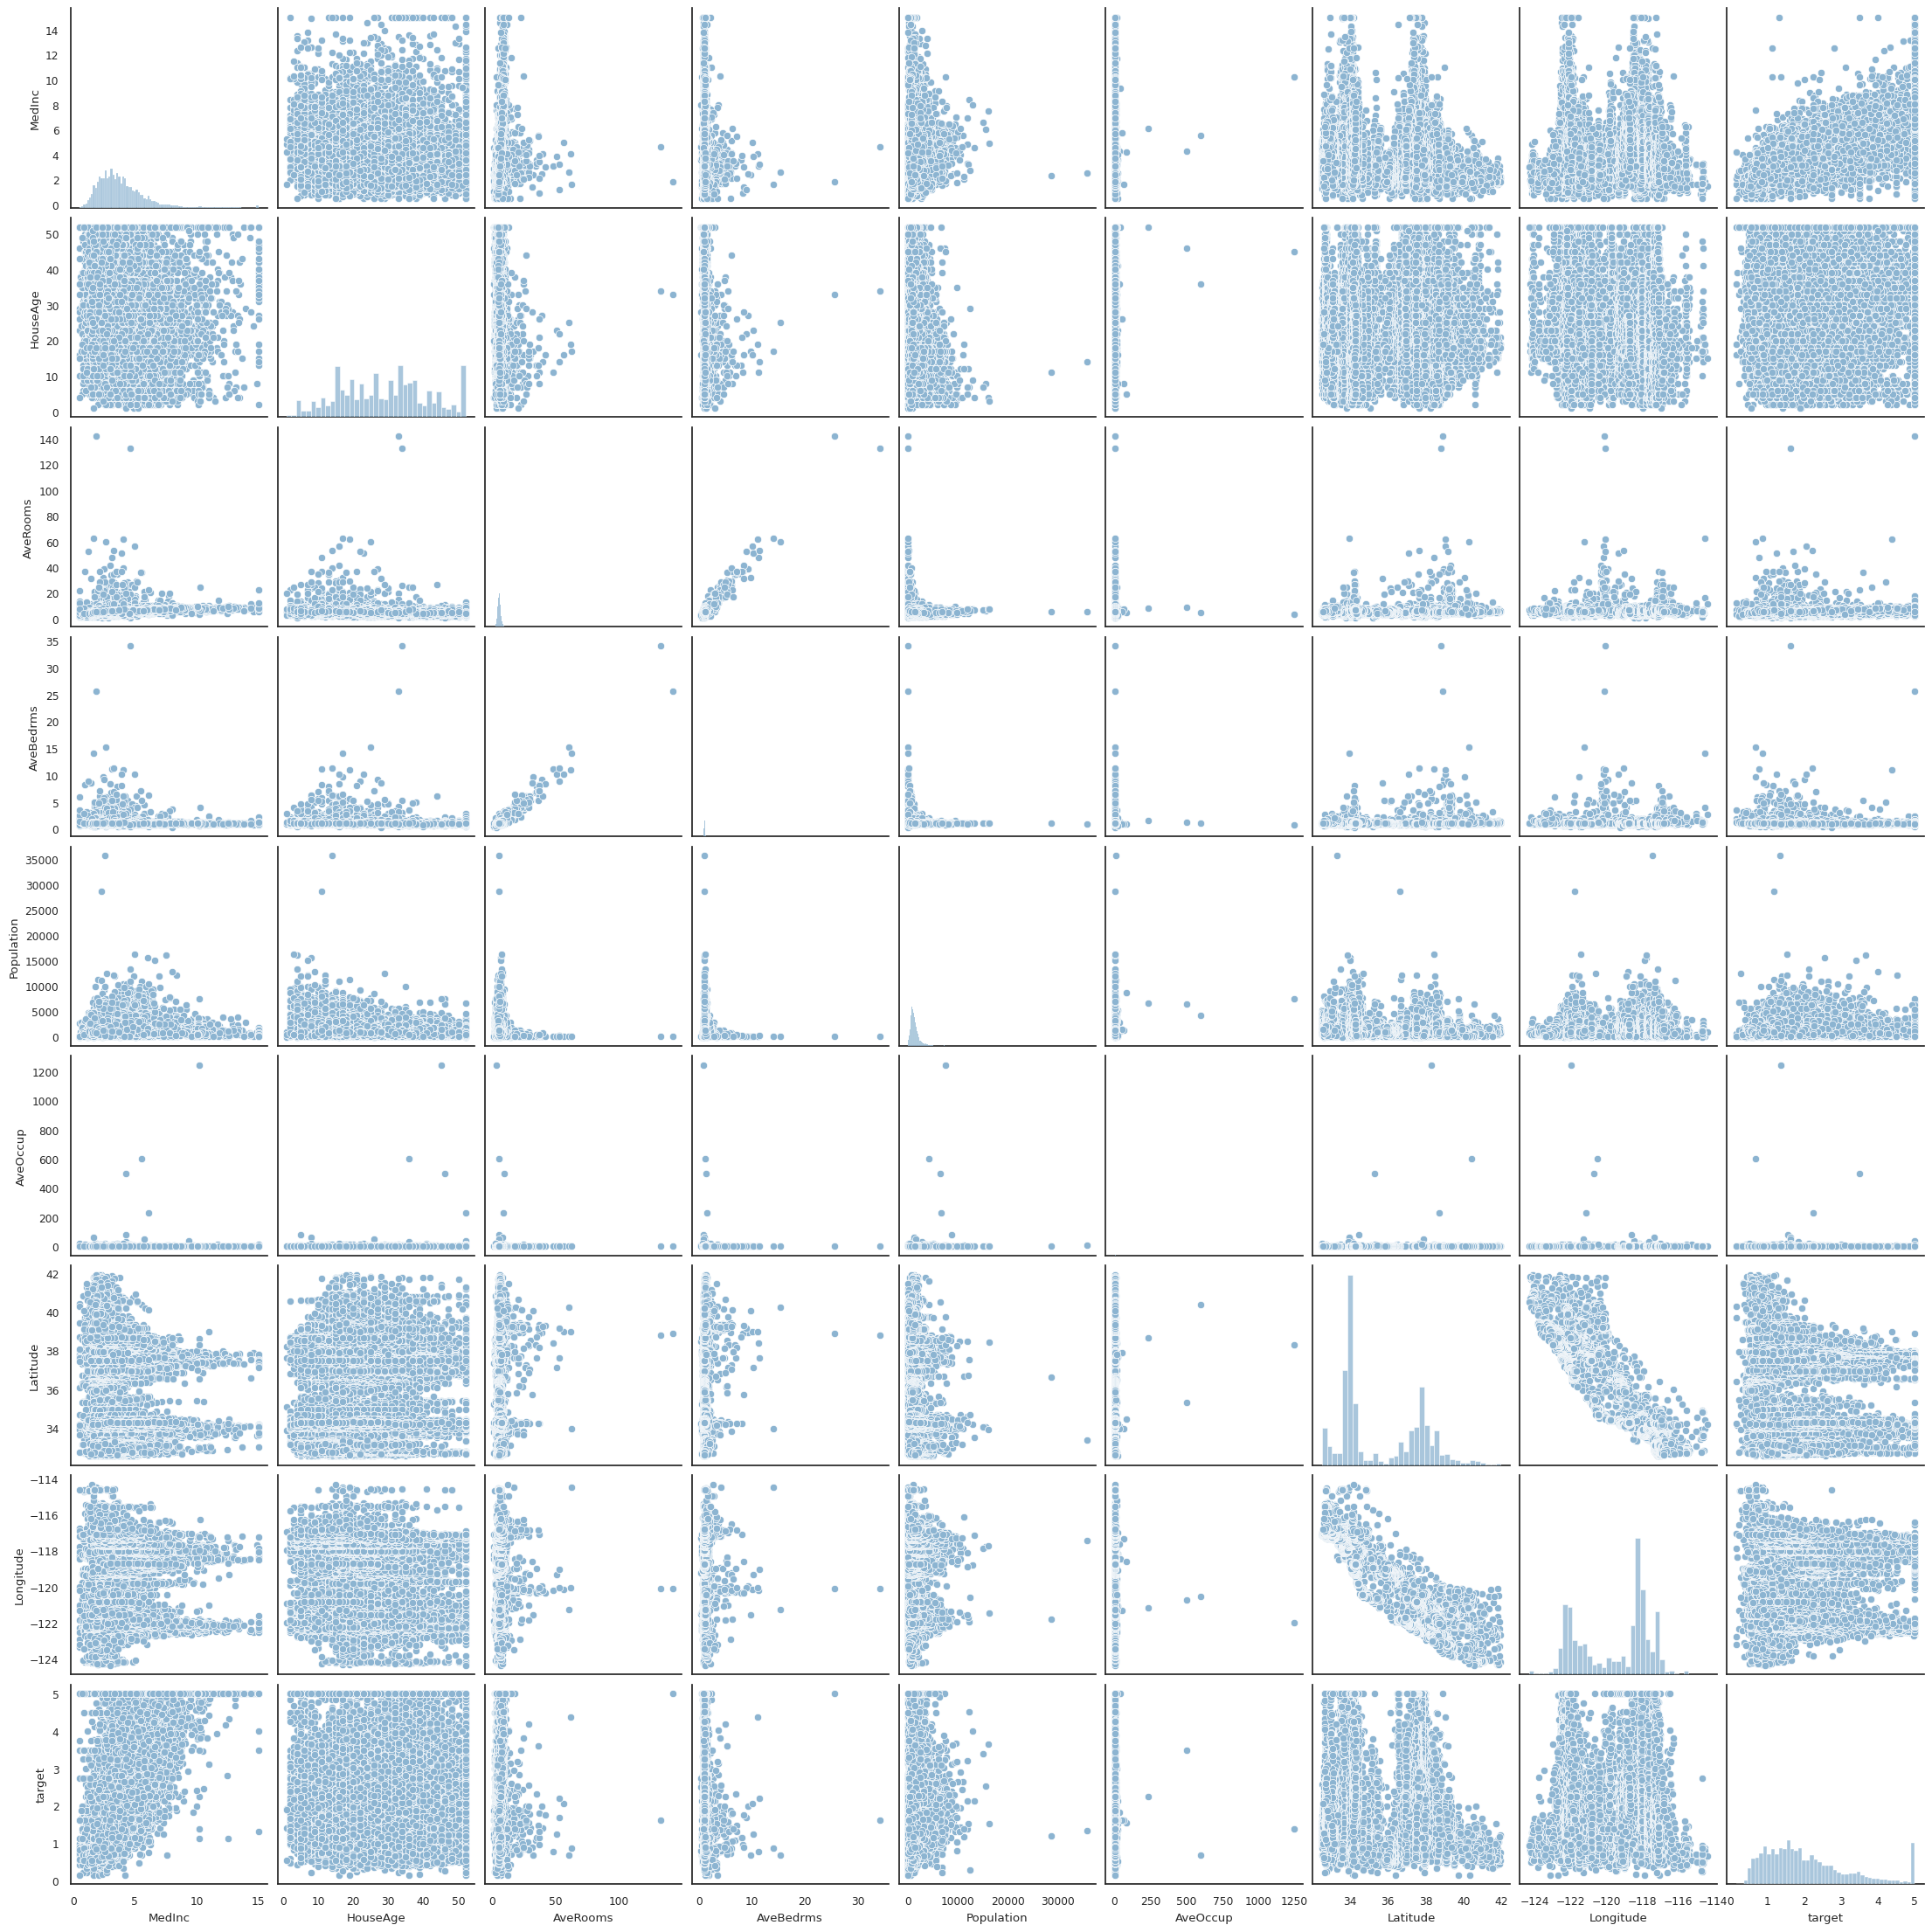

In [45]:
import seaborn as sns
sns.pairplot(df_house)

##### **Предварительный анализ показал, что явных зависимостей для 'target' не прослеживается, возможно, связан с переменной MedInc (средний доход), но связь на графике нечеткая.**
наблюдаются зависимые параметры:
1. 'AveRooms' от 'AveBedrms' 
2. 'Latitude' от 'Longitude'

In [46]:
df_house.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

— Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.



<Axes: xlabel='MedInc', ylabel='Count'>

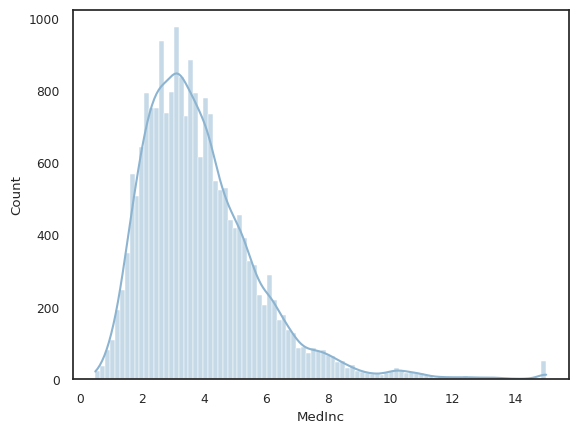

In [47]:
sns.histplot(df_house['MedInc'], kde=True)

In [48]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df_house['AveRooms'], df_house['AveBedrms'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.8476213257130452
P-значение: 0.0


In [49]:
import scipy.stats as stats
# Вычисляем коэффициент корреляции Пирсона (линейная связь)
correlation_coefficient, p_value = stats.pearsonr(df_house['MedInc'], df_house['target'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.6880752079585478
P-значение: 0.0


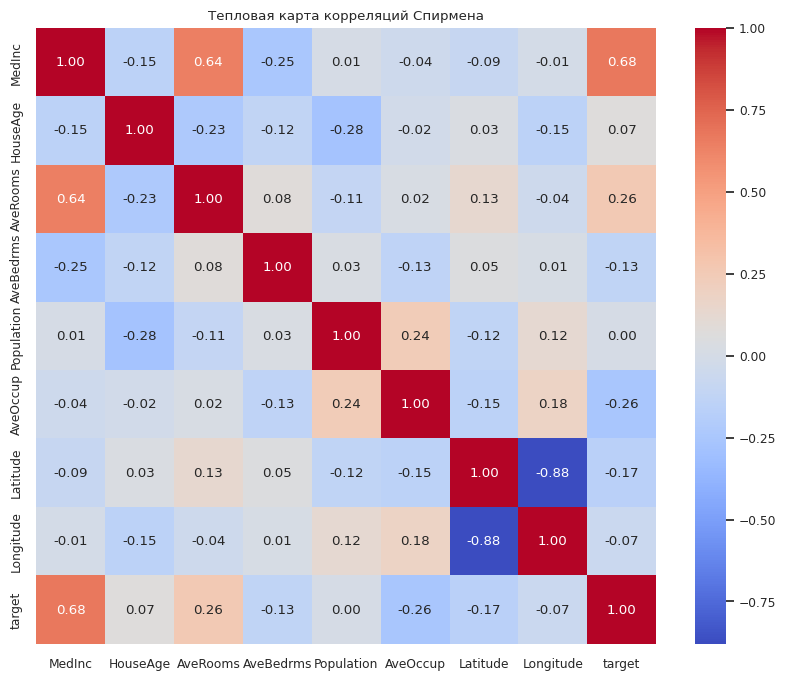

In [50]:
# Выборка количественных переменных
correlation_matrix = df_house.corr(method='spearman')  # Вычисляем матрицу корреляций Спирмена

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

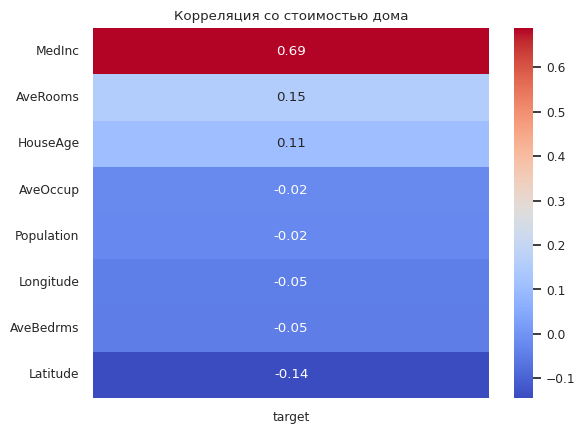

In [51]:
corr = df_house.corr()
target_corr = corr['target'].drop('target')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция со стоимостью дома')
plt.show()

In [52]:
df_house.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

##### **Корреляционный анализ показал, что 'target' связан с переменной MedInc (средний доход): Коэффициент корреляции Спирмена 0.68, Пирсона - 0.69**
**также положительная корреляция с 'HouseAge' и 'AveRooms'**


Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20.


In [53]:
X = df_house.drop(["target"], axis=1)
y = df_house["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.


In [54]:
# Согласно корреляционной матрице стоимость дома прежде всего зависит от количества комнат и дохода
depends_features = ["MedInc", "AveRooms"]


— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.


In [55]:
lr = LinearRegression()
lr.fit(X_train[depends_features], y_train)
y_train_pred = lr.predict(X_train[depends_features])

— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).


In [56]:
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.690985965844761,
MAE :0.61753104121913,
 R2: 0.4830960291312655


In [57]:
# Оценим на тестовой выборке
y_test_pred = lr.predict(X_test[depends_features])
print(f'MSE: {mean_squared_error(y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.7021550469058007,
MAE :0.624682807713972,
 R2: 0.4641710652437856


— Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

In [58]:
# попробуем обучить на всех признаках
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_train_pred = lr1.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 0.5179331255246699,
MAE :0.5286283596581929,
 R2: 0.6125511913966952


In [59]:
# Оценим на тестовой выборке
y_test_pred = lr1.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 0.5558915986952443,
MAE :0.533200130495656,
 R2: 0.5757877060324508


In [60]:
print(list(zip(df_house.columns, lr1.coef_)))

[('MedInc', np.float64(0.4486749096657172)), ('HouseAge', np.float64(0.009724257517904804)), ('AveRooms', np.float64(-0.12332334282795833)), ('AveBedrms', np.float64(0.7831449067929713)), ('Population', np.float64(-2.0296205801456127e-06)), ('AveOccup', np.float64(-0.0035263184871341642)), ('Latitude', np.float64(-0.419792486588359)), ('Longitude', np.float64(-0.43370806496398795))]


##### **При обучении на всей выборке качество предсказаний улучшилось**:
коэффициенты ошибок уменьшились, а коэффициент детерминации увеличился (0.46 -> 0.58)


In [61]:
# выберем популяцию и количество проживающих
depends_features = ['Population', 'AveOccup']
lr2 = LinearRegression()
lr2.fit(X_train[depends_features], y_train)
y_train_pred = lr2.predict(X_train[depends_features])
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

MSE: 1.3353268404062562,
MAE :0.913492555540668,
 R2: 0.0010857233985195336


In [62]:
# Оценим на тестовой выборке
y_test_pred = lr2.predict(X_test[depends_features])
print(f'MSE: {mean_squared_error(y_test, y_test_pred)},\
\nMAE :{mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

MSE: 1.3093267286970431,
MAE :0.9054876792721974,
 R2: 0.000825886850462032


##### **При обучении на выборке с колонками, имеющими низкую обратную корреляцию, качество предсказаний стало неприемлемым, т.к. коэффициент детерминации близок к 0**


In [63]:
df_house.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')